In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, r2_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [42]:
heart_failure_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [43]:
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [44]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [45]:
heart_failure_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [46]:
heart_failure_df[['smoking', 'DEATH_EVENT']].groupby('smoking', as_index=False).mean().sort_values(by='smoking',ascending=False)

,smoking,DEATH_EVENT
1,1,0.312500
0,0,0.325123


In [47]:
heart_failure_df[['sex', 'DEATH_EVENT']].groupby('sex', as_index=False).mean().sort_values(by='sex',ascending=False)

,sex,DEATH_EVENT
1,1,0.319588
0,0,0.323810


In [48]:
heart_failure_df['ejection_fraction'].value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
80     1
70     1
65     1
14     1
Name: ejection_fraction, dtype: int64

In [49]:
heart_failure_df[['ejection_fraction', 'DEATH_EVENT']].groupby('ejection_fraction', as_index=False).mean().sort_values(by='DEATH_EVENT',ascending=False)

,ejection_fraction,DEATH_EVENT
0,14,1.000000
15,70,1.000000
1,15,1.000000
14,65,1.000000
3,20,0.888889
2,17,0.500000
4,25,0.500000
13,62,0.500000
5,30,0.382353
7,38,0.375000


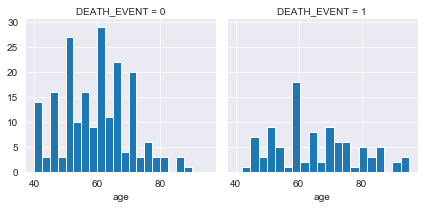

In [50]:
g = sns.FacetGrid(heart_failure_df,col='DEATH_EVENT')
g.map(plt.hist, 'age', bins=20)

In [51]:
heart_failure_df['age_band'] = pd.cut(heart_failure_df['age'], 5)
heart_failure_df[['age_band', 'DEATH_EVENT']].groupby('age_band', as_index=False).mean().sort_values(by='age_band',ascending=False)


,age_band,DEATH_EVENT
4,"(84.0, 95.0]",0.714286
3,"(73.0, 84.0]",0.555556
2,"(62.0, 73.0]",0.294118
1,"(51.0, 62.0]",0.273684
0,"(39.945, 51.0]",0.256410


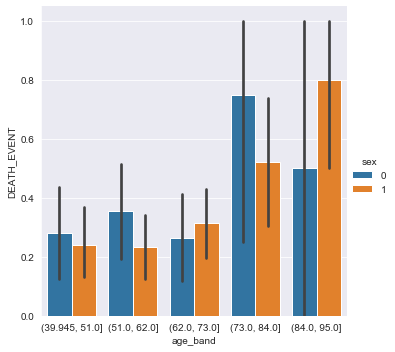

In [52]:
sns.set_style('darkgrid')
g = sns.catplot(x="age_band", y="DEATH_EVENT",
                hue='sex',
                data=heart_failure_df,
                kind="bar")

In [53]:
heart_failure_df['age_band'].value_counts()

(51.0, 62.0]      95
(62.0, 73.0]      85
(39.945, 51.0]    78
(73.0, 84.0]      27
(84.0, 95.0]      14
Name: age_band, dtype: int64

In [54]:
# divide patients into age groups and number them

heart_failure_df.loc[ heart_failure_df['age'] <= 51.0, 'age'] = 0
heart_failure_df.loc[(heart_failure_df['age'] > 51.0) & (heart_failure_df['age'] <= 62.0), 'age'] = 1
heart_failure_df.loc[(heart_failure_df['age'] > 62.0) & (heart_failure_df['age'] <= 73.0), 'age'] = 2
heart_failure_df.loc[(heart_failure_df['age'] > 73.0) & (heart_failure_df['age'] <= 84.0), 'age'] = 3
heart_failure_df.loc[ heart_failure_df['age'] > 84.0, 'age'] = 4
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_band
0,3.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,"(73.0, 84.0]"
1,1.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,"(51.0, 62.0]"
2,2.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,"(62.0, 73.0]"
3,0.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,"(39.945, 51.0]"
4,2.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,"(62.0, 73.0]"


In [55]:
heart_failure_df = heart_failure_df.drop(['age_band'],axis=1)

In [56]:
# divide patients into platelets groups followed by numbering

heart_failure_df['platelets_band'] = pd.cut(heart_failure_df['platelets'], 5)
heart_failure_df[['platelets_band', 'DEATH_EVENT']].groupby('platelets_band', as_index=False).mean().sort_values(by='platelets_band',ascending=False)


,platelets_band,DEATH_EVENT
4,"(685020.0, 850000.0]",0.000000
3,"(520040.0, 685020.0]",0.333333
2,"(355060.0, 520040.0]",0.361111
1,"(190080.0, 355060.0]",0.305419
0,"(24275.1, 190080.0]",0.363636


In [57]:
heart_failure_df['platelets_band'].value_counts().sort_values(ascending=False)

(190080.0, 355060.0]    203
(24275.1, 190080.0]      55
(355060.0, 520040.0]     36
(520040.0, 685020.0]      3
(685020.0, 850000.0]      2
Name: platelets_band, dtype: int64

In [58]:
heart_failure_df.loc[ heart_failure_df['platelets'] <= 190080.0, 'platelets'] = 0
heart_failure_df.loc[(heart_failure_df['platelets'] > 190080.0) & (heart_failure_df['platelets'] <= 355060.0), 'platelets'] = 1
heart_failure_df.loc[(heart_failure_df['platelets'] > 355060.0) & (heart_failure_df['platelets'] <= 520040.0), 'platelets'] = 2
heart_failure_df.loc[(heart_failure_df['platelets'] > 520040.0) & (heart_failure_df['platelets'] <= 685020.0), 'platelets'] = 3
heart_failure_df.loc[ heart_failure_df['platelets'] > 685020.0, 'platelets'] = 4
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,platelets_band
0,3.0,0,582,0,20,1,1.0,1.9,130,1,0,4,1,"(190080.0, 355060.0]"
1,1.0,0,7861,0,38,0,1.0,1.1,136,1,0,6,1,"(190080.0, 355060.0]"
2,2.0,0,146,0,20,0,0.0,1.3,129,1,1,7,1,"(24275.1, 190080.0]"
3,0.0,1,111,0,20,0,1.0,1.9,137,1,0,7,1,"(190080.0, 355060.0]"
4,2.0,1,160,1,20,0,1.0,2.7,116,0,0,8,1,"(190080.0, 355060.0]"


In [60]:
heart_failure_df = heart_failure_df.drop(['platelets_band'],axis=1)

KeyError: "['platelets_band'] not found in axis"

In [61]:
heart_failure_df['creatinine_phosphokinase_band'] = pd.cut(heart_failure_df['creatinine_phosphokinase'], 5)
heart_failure_df[['creatinine_phosphokinase_band', 'DEATH_EVENT']].groupby('creatinine_phosphokinase_band', as_index=False).mean().sort_values(by='creatinine_phosphokinase_band',ascending=False)


,creatinine_phosphokinase_band,DEATH_EVENT
4,"(6293.4, 7861.0]",1.000000
3,"(4725.8, 6293.4]",0.500000
2,"(3158.2, 4725.8]",0.333333
1,"(1590.6, 3158.2]",0.210526
0,"(15.162, 1590.6]",0.322344


In [62]:
heart_failure_df['creatinine_phosphokinase_band'].value_counts()

(15.162, 1590.6]    273
(1590.6, 3158.2]     19
(3158.2, 4725.8]      3
(6293.4, 7861.0]      2
(4725.8, 6293.4]      2
Name: creatinine_phosphokinase_band, dtype: int64

In [63]:
heart_failure_df.loc[ heart_failure_df['creatinine_phosphokinase'] <= 1590.6, 'creatinine_phosphokinase'] = 0
heart_failure_df.loc[(heart_failure_df['creatinine_phosphokinase'] > 1590.6) & (heart_failure_df['creatinine_phosphokinase'] <= 3158.2), 'creatinine_phosphokinase'] = 1
heart_failure_df.loc[(heart_failure_df['creatinine_phosphokinase'] > 3158.2) & (heart_failure_df['creatinine_phosphokinase'] <= 4725.8), 'creatinine_phosphokinase'] = 2
heart_failure_df.loc[(heart_failure_df['creatinine_phosphokinase'] > 4725.8) & (heart_failure_df['creatinine_phosphokinase'] <= 6293.4), 'creatinine_phosphokinase'] = 3
heart_failure_df.loc[ heart_failure_df['creatinine_phosphokinase'] > 6293.4, 'creatinine_phosphokinase'] = 4
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,creatinine_phosphokinase_band
0,3.0,0,0,0,20,1,1.0,1.9,130,1,0,4,1,"(15.162, 1590.6]"
1,1.0,0,4,0,38,0,1.0,1.1,136,1,0,6,1,"(6293.4, 7861.0]"
2,2.0,0,0,0,20,0,0.0,1.3,129,1,1,7,1,"(15.162, 1590.6]"
3,0.0,1,0,0,20,0,1.0,1.9,137,1,0,7,1,"(15.162, 1590.6]"
4,2.0,1,0,1,20,0,1.0,2.7,116,0,0,8,1,"(15.162, 1590.6]"


In [67]:
heart_failure_df = heart_failure_df.drop(['creatinine_phosphokinase_band'],axis=1)

In [68]:
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3.0,0,0,0,20,1,1.0,1.9,130,1,0,4,1
1,1.0,0,4,0,38,0,1.0,1.1,136,1,0,6,1
2,2.0,0,0,0,20,0,0.0,1.3,129,1,1,7,1
3,0.0,1,0,0,20,0,1.0,1.9,137,1,0,7,1
4,2.0,1,0,1,20,0,1.0,2.7,116,0,0,8,1


In [70]:
X2 = heart_failure_df.iloc[:, :-1]
y2 = heart_failure_df.iloc[:,-1]

[0.08149391 0.03077847 0.02575561 0.03485709 0.14692986 0.02533208
 0.04342398 0.13282498 0.10268628 0.02993316 0.03117172 0.31481285]


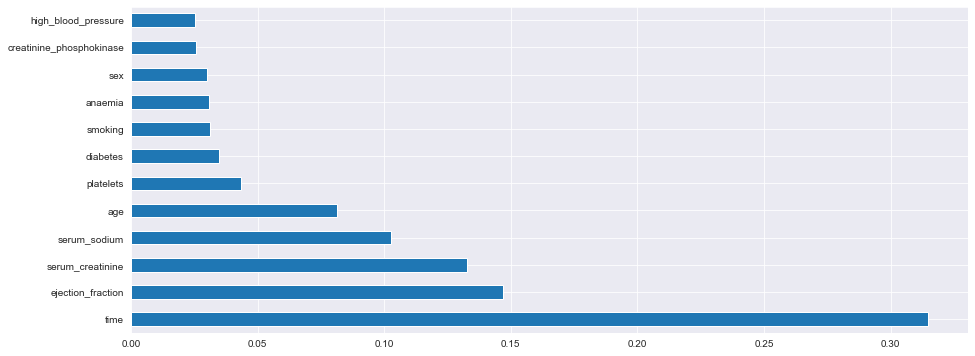

In [73]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X2,y2)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X2.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

First, let's try to expand the features and use them all without exception.

In [75]:
hf_df_dummies = pd.get_dummies(heart_failure_df)

In [76]:
hf_df_dummies.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3.0,0,0,0,20,1,1.0,1.9,130,1,0,4,1
1,1.0,0,4,0,38,0,1.0,1.1,136,1,0,6,1
2,2.0,0,0,0,20,0,0.0,1.3,129,1,1,7,1
3,0.0,1,0,0,20,0,1.0,1.9,137,1,0,7,1
4,2.0,1,0,1,20,0,1.0,2.7,116,0,0,8,1


In [77]:
heart_failure_df.shape, hf_df_dummies.shape

((299, 13), (299, 13))

In [78]:
X = heart_failure_df.drop(['DEATH_EVENT'],axis=1)
y = heart_failure_df.DEATH_EVENT

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [82]:
sample_list = [X_train, X_test, y_train, y_test]
for i in sample_list:
    print(i.shape)

(209, 12)
(90, 12)
(209,)
(90,)


In [84]:
r_state = 3
classifier_DTC = DecisionTreeClassifier(random_state = r_state)
classifier_DTC.fit(X_train, y_train)

y_pred_DTC = classifier_DTC.predict(X_test)
accuracy_score(y_test, y_pred_DTC)

0.6888888888888889

In [85]:
classifier_SVC = SVC(random_state = r_state)
classifier_SVC.fit(X_train, y_train)

y_pred_SVC = classifier_SVC.predict(X_test)
accuracy_score(y_test, y_pred_SVC)

0.7555555555555555

In [86]:
classifier_ABC = AdaBoostClassifier(learning_rate = 0.01,
                                   random_state = r_state) # Default using Decision Tree Classifier
classifier_ABC.fit(X_train, y_train)

y_pred_ABC = classifier_ABC.predict(X_test)
accuracy_score(y_test, y_pred_ABC)

0.7666666666666667

In [87]:
classifier_RFC = RandomForestClassifier(random_state = r_state)
classifier_RFC.fit(X_train, y_train)

y_pred_RFC = classifier_RFC.predict(X_test)
accuracy_score(y_test, y_pred_RFC)

0.7777777777777778

In [88]:
classifier_ABC_RF = AdaBoostClassifier(RandomForestClassifier(random_state = r_state),
                                       learning_rate = 0.01,
                                       random_state = r_state) 
classifier_ABC_RF.fit(X_train, y_train)

y_pred_ABC_RF = classifier_ABC_RF.predict(X_test)
accuracy_score(y_test, y_pred_ABC_RF)

0.7777777777777778

In [89]:
classifier_GBC = GradientBoostingClassifier(random_state = r_state)
classifier_GBC.fit(X_train, y_train)

y_pred_GBC = classifier_GBC.predict(X_test)
accuracy_score(y_test, y_pred_GBC)

0.7666666666666667

In [90]:
classifier_KNN = KNeighborsClassifier(n_neighbors = 5)
classifier_KNN.fit(X_train, y_train)

y_pred_KNN = classifier_KNN.predict(X_test)
accuracy_score(y_test, y_pred_KNN)

0.7666666666666667

In [91]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)

y_pred_XGB = classifier_XGB.predict(X_test)
accuracy_score(y_test, y_pred_XGB)

0.7777777777777778

In [92]:
classifiers = [classifier_DTC,
               classifier_SVC,
               classifier_ABC, 
               classifier_RFC, 
               classifier_ABC_RF, 
               classifier_GBC, 
               classifier_KNN, 
               classifier_XGB]
classifiers_names = ['Decision Tree',
                     'SVC', 
                     'AdaBoost',
                     'Random Forest',
                     'AdaBoost - Random Forest',
                     'Gradient Boosting',
                     'KNeighborsClassifier',
                     'XG Boost']
accuracy_mean = []

for cl in classifiers :
    accuracies = cross_val_score(estimator = cl, 
                                 X = X_train, 
                                 y = y_train, 
                                 cv = 4)
    accuracy_mean.append(accuracies.mean()*100)

    
accuracy_df = pd.DataFrame({'Classifier': classifiers_names,
                           'Accuracy Mean': accuracy_mean})
accuracy_df.sort_values('Accuracy Mean',ascending=False)

,Classifier,Accuracy Mean
7,XG Boost,88.080552
6,KNeighborsClassifier,88.062409
4,AdaBoost - Random Forest,86.656386
2,AdaBoost,86.620102
3,Random Forest,86.166546
1,SVC,86.157475
5,Gradient Boosting,84.243469
0,Decision Tree,77.041001


In [93]:
voting_cl = VotingClassifier(estimators = [('Gradient Boosting', classifier_GBC),
                                              ('Decision Tree',classifier_RFC),
                                              ('XG Boost',classifier_DTC)], 
                                voting = 'hard')
voting_cl.fit(X_train, y_train)
y_pred_vcl = voting_cl.predict(X_test)
accuracy_score(y_test, y_pred_vcl)

0.7777777777777778

In [95]:
parameters = [{
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 250, 500]}]

In [98]:
grid_search_GBC = GridSearchCV(estimator = classifier_XGB,
                               param_grid = parameters,
                               scoring = 'accuracy',
                               cv = 4,
                               n_jobs = -1)

In [99]:
grid_search_GBC.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...
             iid='deprecated', n_jobs=-1,
             param_grid=[{'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                          'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                          'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                          'learning_rate': [0.1, 0.01, 0.001],
              

In [100]:
grid_search_GBC.best_params_

{'colsample_bytree': 0.3,
 'eta': 0.05,
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 250}

In [101]:
best_XGB = grid_search_GBC.best_estimator_

In [103]:
best_XGB.score(X_test,y_test)

0.7555555555555555

In [105]:
best_accuracy_XGB = grid_search_GBC.best_score_
best_parameters_XGB = grid_search_GBC.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_XGB*100))
print("Best Parameters:", best_parameters_XGB)

Best Accuracy: 88.08 %
Best Parameters: {'colsample_bytree': 0.3, 'eta': 0.05, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 250}


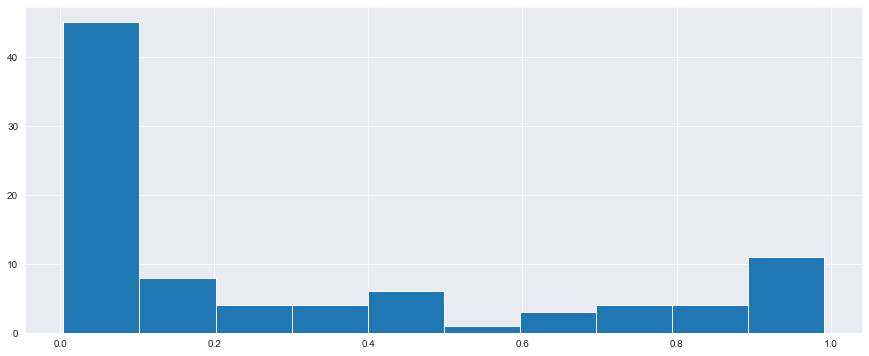

In [106]:
y_predicted_prob = best_XGB.predict_proba(X_test)
pd.Series(y_predicted_prob[:, 1]).hist()

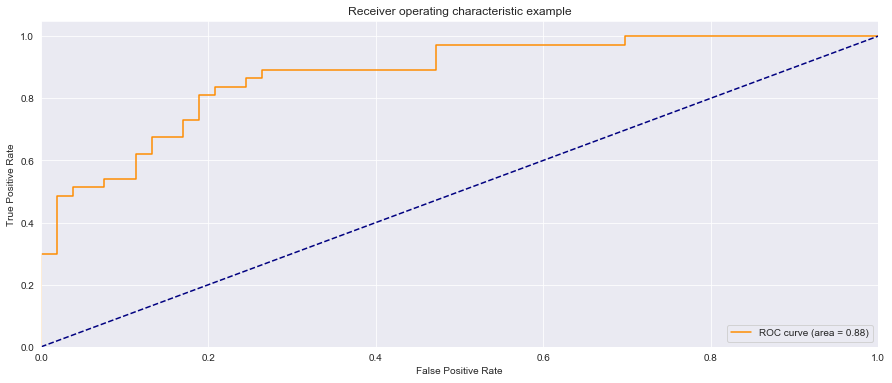

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()